<a href="https://colab.research.google.com/github/uscudum/ML-AS-Multiple-Linear-Regression-StudentPerformance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd

df = pd.read_csv('Student_Performance.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


* **Hours Studied** → Horas dedicadas al estudio.
* **Previous Scores** → Calificaciones obtenidas en exámenes anteriores.
* **Extracurricular Activities** → Participación en actividades extracurriculares (Sí/No).
* **Sleep Hours** → Horas promedio de sueño al día.
* **Sample Question Papers Practiced** → Número de pruebas/guías practicadas.
* **Performance Index** → Índice de rendimiento académico (variable objetivo).

In [68]:
df.columns = ['horas', 'puntajePrevio', 'extra', 'suenio', 'pruebas', 'rendimiento']
df.head()

,horas,puntajePrevio,extra,suenio,pruebas,rendimiento
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [69]:
df['extra'] = df['extra'].replace({'Yes': 1, 'No': 0})
df.head()

/tmp/ipython-input-2765582204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['extra'] = df['extra'].replace({'Yes': 1, 'No': 0})


,horas,puntajePrevio,extra,suenio,pruebas,rendimiento
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


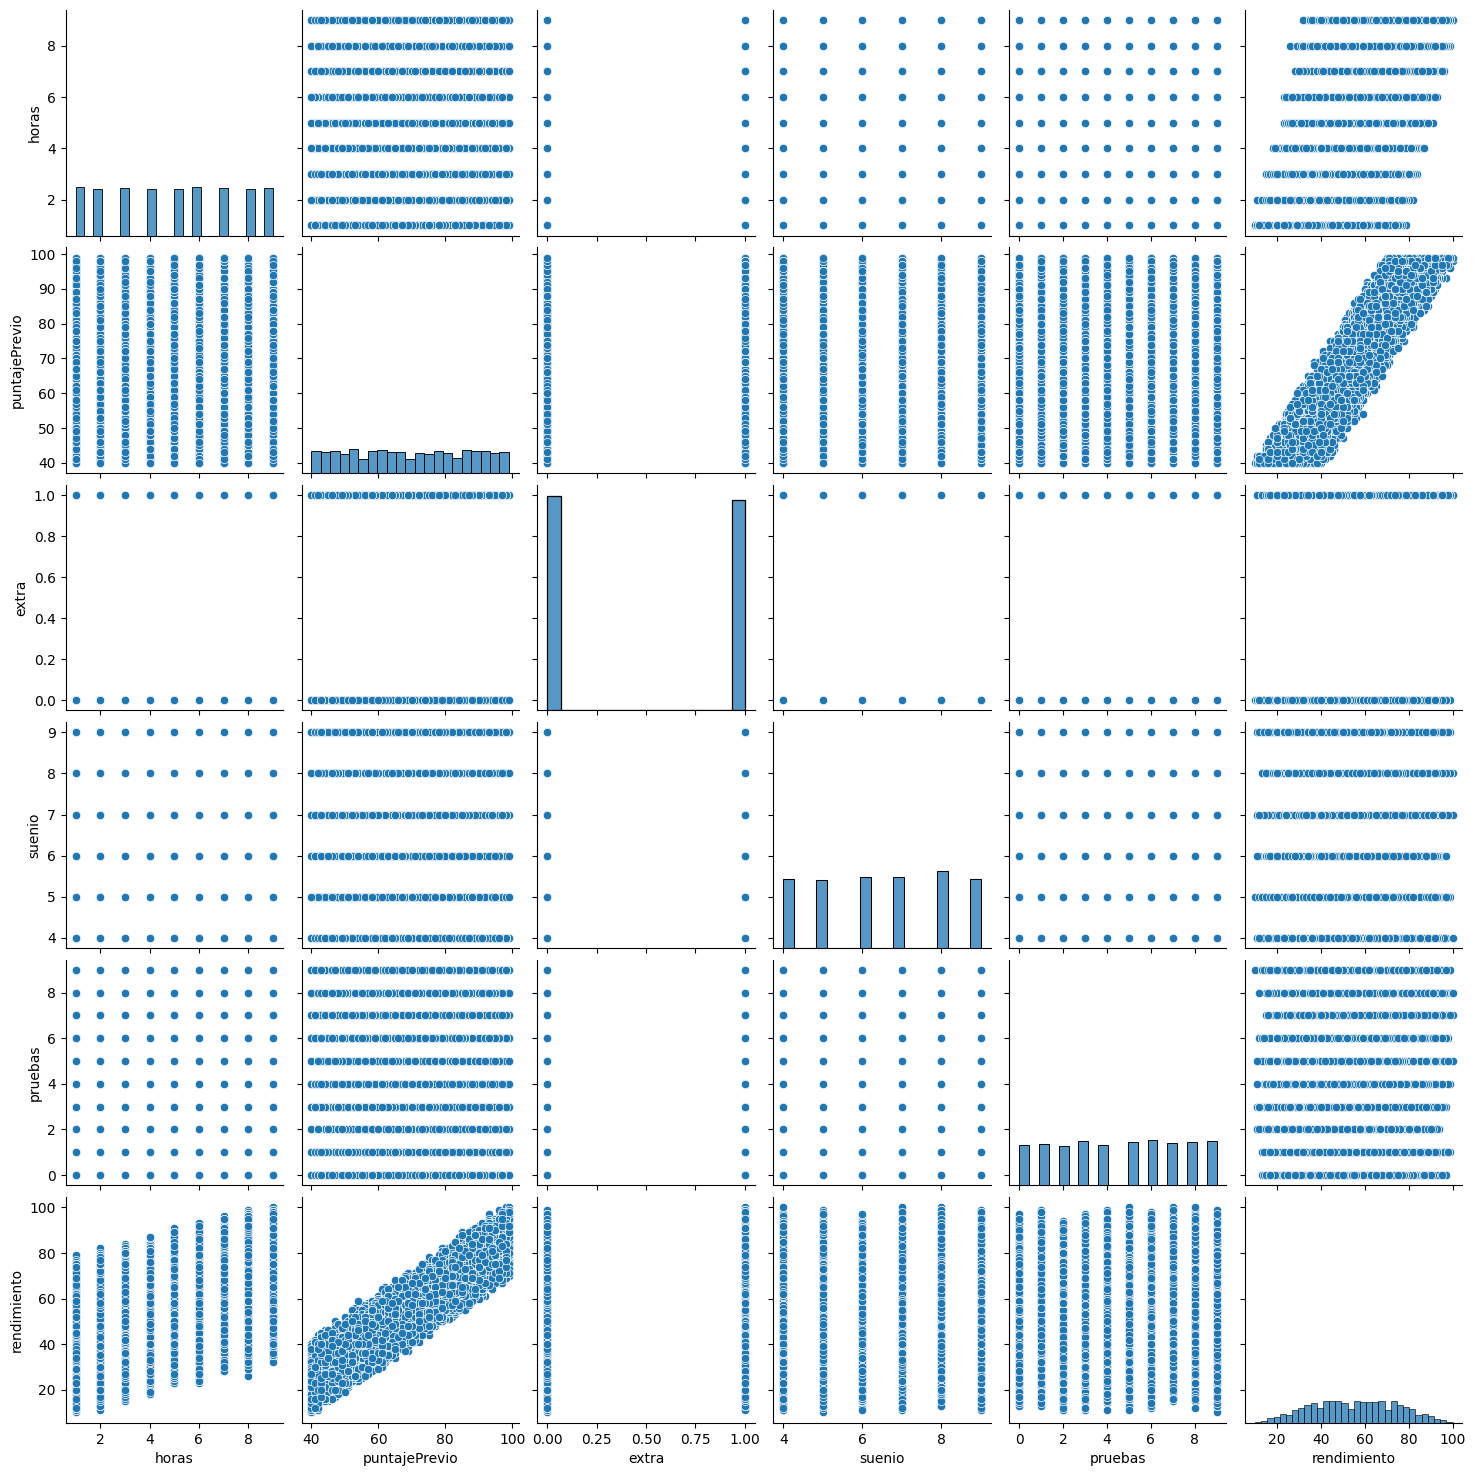

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['horas', 'puntajePrevio', 'extra', 'suenio', 'pruebas', 'rendimiento']
sns.pairplot(df[cols])
plt.show()

<Axes: >

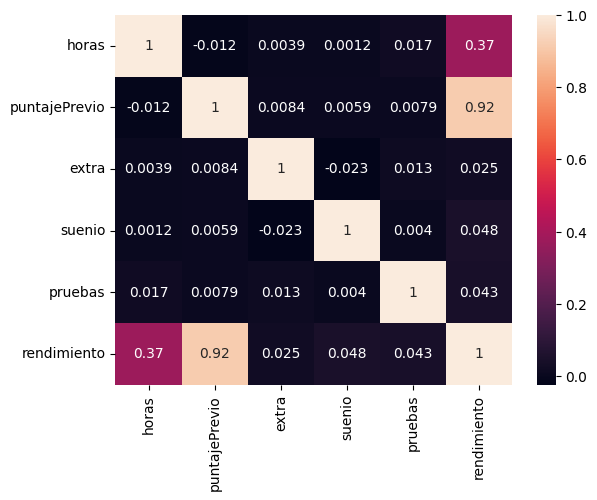

In [71]:
sns.heatmap(df[cols].corr(), annot=True)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Definición de variables
X = df[['horas', 'suenio']].values        # Variables independientes
y = df[['rendimiento']].values            # Variable dependiente

# Escaladores para X e y
scalerX = StandardScaler()
scalerY = StandardScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# Entrenamiento del modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_scaled, y_scaled)

LinearRegression()

In [76]:
import numpy as np

# Ejemplo de entrada manual
horasEstudio = 6
horasSuenio = 8

# Transformamos la entrada al espacio estandarizado
entradaEscalada = scalerX.transform(np.array([[horasEstudio, horasSuenio]]))

# Predicción en espacio estandarizado
prediccionEscalada = modelo.predict(entradaEscalada)

# Transformamos la salida al espacio original
prediccion = scalerY.inverse_transform(prediccionEscalada)

print("El rendimiento estimado del estudiante es:", round(prediccion[0][0], 2) , "% ")

El rendimiento estimado del estudiante es: 58.81 % 
